# Lecture 2: Time Integration Methods
In this lecture, we will explore different time integration methods for simulating the motion of a particle in a constant electromagnetic field.

Time integration methods are numerical techniques used to approximate the solutions of ordinary differential equations (ODEs) over a sequence of discrete time steps. These methods play a crucial role in simulating dynamic systems and physical processes that evolve over time. In the context of computational electromagnetics and plasma physics, time integration is essential for accurately modeling the interactions between electromagnetic fields and charged particles.

# Explicit and Implicit Numerical Integration Schemes

Numerical integration schemes are essential tools in computational physics for approximating the solutions of ordinary differential equations (ODEs) and simulating the behavior of dynamical systems. Two main categories of numerical integration schemes are explicit and implicit methods, each with its own advantages and considerations.

## Explicit

In an explicit numerical integration scheme, the solution at the next time step is computed explicitly using the information from the current time step. One of the simplest explicit methods is Euler's method. Given an ODE $\frac{dy}{dt} = f(t, y)$ and an initial condition $y(t_0) = y_0$, the explicit Euler's method updates the solution as:

$$
y_{n+1} = y_n + \Delta t \cdot f(t_n, y_n)
$$

Explicit methods are generally easy to implement and computationally efficient. However, they may have limitations in terms of stability and accuracy, especially for stiff or oscillatory systems.

## Implicit

In an implicit numerical integration scheme, the solution at the next time step is obtained by solving an equation that involves both the current and future values of the solution. This often requires iterative methods to find the solution. One common implicit method is the backward Euler method. Given the same ODE and initial condition, the backward Euler's method updates the solution as:

$$
y_{n+1} = y_n + \Delta t \cdot f(t_{n+1}, y_{n+1})
$$

Implicit methods are more stable than explicit methods and can handle stiff systems more effectively. They are particularly useful when the time step needs to be large or when dealing with complex systems.

## Comparison and Considerations

Explicit methods are generally easier to implement and compute, but they may require smaller time steps for stability. Implicit methods offer better stability and accuracy but involve solving nonlinear equations at each time step, which can be computationally expensive.

The choice between explicit and implicit methods depends on the specific characteristics of the problem at hand, including stability requirements, desired accuracy, and computational resources.

# Example: Lorentz Equation

As an illustrative example for applying time integration methods, let's consider the Lorentz equation, which describes the motion of a charged particle in an electromagnetic field. The Lorentz equation can be written as follows:

$$
\frac{d\mathbf{v}}{dt} = \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right)
$$

where:
- $\mathbf{v}$ is the velocity vector of the particle,
- $\mathbf{E}$ is the electric field vector,
- $\mathbf{B}$ is the magnetic field vector,
- $q$ is the charge of the particle,
- $m$ is the mass of the particle.


To discretize this equation, we'll use a time step $\Delta t$ and update the particle's velocity and position as follows:

$$
\Delta \mathbf{v} = \frac{q}{m} \left( \mathbf{E} + \mathbf{v} \times \mathbf{B} \right) \cdot \Delta t
$$

$$
\Delta \mathbf{x} = \mathbf{v} \cdot \Delta t
$$

In this example, we'll use the Lorentz equation to simulate the motion of a charged particle in a constant electromagnetic field using various time integration methods that we've discussed.

To begin, we'll need to define the initial conditions, such as the particle's initial position, velocity, charge, mass, and the components of the electric and magnetic fields. We'll then apply the chosen time integration methods to update the particle's velocity and position over a sequence of discrete time steps. The resulting trajectory of the particle will provide insights into its motion under the influence of the electromagnetic field.

Show that in a constant cross field $\mathbf{E} = (0,E,0)$ and $\mathbf{B} = (0,0,B)$ that particle path obeys the following parametric equations

$$
x(t) = R (\omega t - \sin \omega t)
$$

$$
y(t) = R (1- \cos \omega t)
$$

where $\omega = \frac{qB}{m}$ and $R = \frac{m E}{q B^2}$.

<div style="text-align:center">
    <figure>
        <img src="cycloid.gif" alt="cycloid" style="width: 1000;">
        <figcaption>Fig.1 Cycloid Motion</figcaption>
    </figure>
</div>

## Euler's First-Order Scheme

Euler's method is a simple and straightforward time integration technique. Given an initial state $(x_0, y_0)$ and an ordinary differential equation $\frac{dx}{dt} = f(x, y)$ and $\frac{dy}{dt} = g(x, y)$, the Euler's method updates the state at each time step using the following formula:

$$
x_{i+1} = x_i + f(x_i, y_i) \cdot \Delta t
$$
$$
y_{i+1} = y_i + g(x_i, y_i) \cdot \Delta t
$$

where $\Delta t$ is the time step size, and $f(x, y)$ and $g(x, y)$ are the functions defining the derivatives in the x and y directions, respectively.

<div style="text-align:center">
    <figure>
        <img src="euler.svg" alt="Euler's Method" style="width: 400px;background-color: #EEE;">
        <figcaption>Fig.2 Euler's Method</figcaption>
    </figure>
</div>

### Implementation
Let's implement Euler's first-order scheme for simulating the projectile motion in a constant electromagnetic field.

In [29]:
import numpy as np
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees

# field parameters
E = 1
B = 1

# Time step size for the simulation
dt = 0.01  # seconds

# Number of time steps to simulate
num_steps = 1000

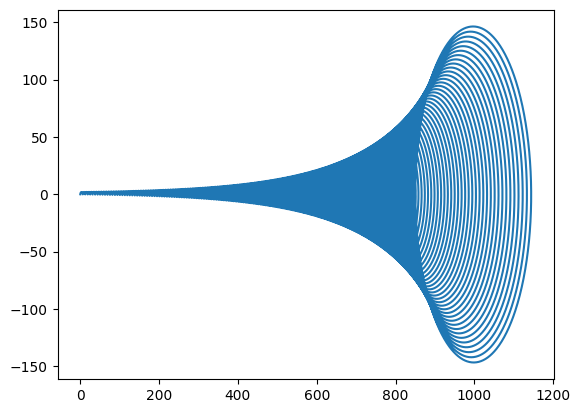

In [30]:
#Explicit

import matplotlib.pyplot as plt
#เขียนเอง
x_old=0
y_old=0
vx_old=0
vy_old=0
t=0
q=1
m=1
position_y=[]
position_x=[]

while t <= num_steps:
    
    x_new = x_old+vx_old*dt
    y_new = y_old +vy_old*dt
    
    position_x.append(x_new)
    position_y.append(y_new)

    ax=(q/m)*(vy_old*B)
    ay=(q/m)*(E-vx_old*B)
    
    
    vx_new = vx_old+ax*dt
    vy_new = vy_old+ay*dt
    
    x_new = x_old+vx_old*dt
    y_new = y_old +vy_old*dt
     
    x_old=x_new
    y_old=y_new
    vx_old=vx_new
    vy_old=vy_new
    
    t+=dt
plt.plot(position_x,position_y)
#plt.xlim([-0.1,25.2])
#plt.ylim([0,2.5])

position_x1=position_x
position_y1=position_y

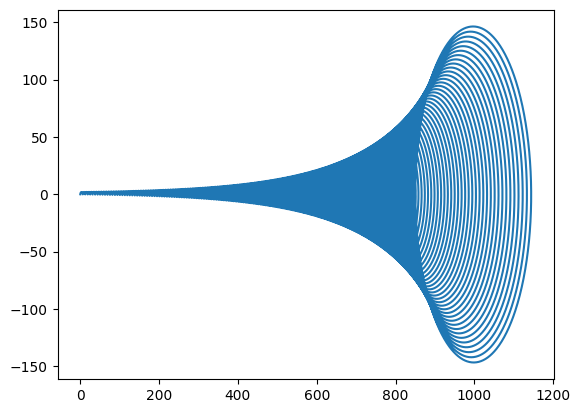

In [47]:
import matplotlib.pyplot as plt
import numpy as np
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees

# field parameters
E = 1
B = 1
q=1
m=1

# Time step size for the simulation
dt = 0.01# seconds

# Number of time steps to simulate
num_steps = 100000


def acceleration_function(vx_euler, vy_euler, E, B,q,m):
    ax=(q/m)*(vy_euler[i - 1]*B)
    ay=(q/m)*(E-vx_euler[i - 1]*B)
    return ax, ay

# Implement Euler's first-order scheme
def acceleration_function(vx_euler, vy_euler, E, B,q,m):
    ax=(q/m)*(vy_euler*B)
    ay=(q/m)*(E-vx_euler*B)
    return ax, ay

def euler_method(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)

    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler[i - 1], vy_euler[i - 1], E, B,q,m)
        
        # Update velocities and positions using Euler's method
        
        vx_euler[i] = vx_euler[i - 1]+ax*dt
        vy_euler[i] = vy_euler[i - 1]+ay*dt
        
        x_euler[i] = x_euler[i-1]+vx_euler[i]*dt
        y_euler[i]= y_euler[i-1] +vy_euler[i]*dt
        
    return x_euler, y_euler


x,y=euler_method(dt, num_steps, acceleration_function)


plt.plot(x,y)
#plt.xlim([-0.1,25.2])
#plt.ylim([0,2.5])

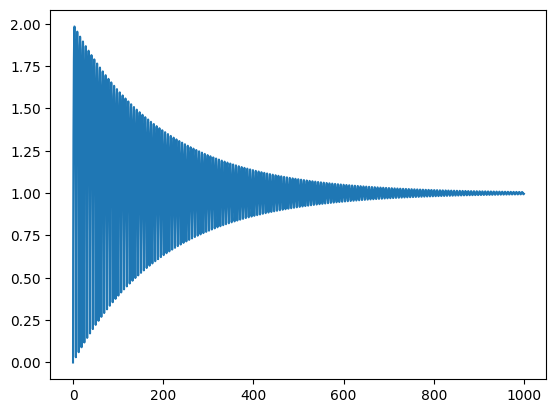

In [41]:
#backward-euler   (Implicit)
import matplotlib.pyplot as plt
#เขียนเอง
x_old=0
y_old=0
vx_old=0
vy_old=0
t=0
q=1
m=1
position_y=[]
position_x=[]

while t <= num_steps:
    
    x_new = x_old+vx_old*dt
    y_new = y_old +vy_old*dt
    

    ax=(q/m)*(vy_old*B)
    ay=(q/m)*(E-vx_old*B)
    
    vx_new = vx_old+ax*dt
    vy_new = vy_old+ay*dt
    
    #backward
    
    ax=(q/m)*(vy_new*B)
    #ay=(q/m)*(E-vx_old*B)
    
    vx_new = vx_old+(ax*dt)
    vy_new = (vy_old+(q/m)*dt*E -(q/m)*dt*B*vx_old)/(1+((q/m)*dt*B)**2)
    
    
    vx_old=vx_new
    vy_old=vy_new
    

    x_new = x_old+vx_old*dt
    y_new = y_old +vy_old*dt
    
    position_x.append(x_new)
    position_y.append(y_new)
    
    x_old=x_new
    y_old=y_new
    
    t+=dt

plt.plot(position_x,position_y)
#plt.xlim([-0.1,25.2])
#plt.ylim([0,2.5])


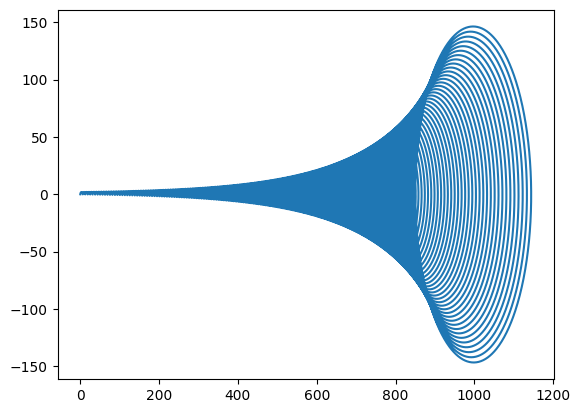

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees

# field parameters
E = 1
B = 1
q=1
m=1

# Time step size for the simulation
dt = 0.01# seconds

# Number of time steps to simulate
num_steps = 100000

# Implement Euler's first-order scheme
def acceleration_function(vx_euler, vy_euler, E, B,q,m):
    ax=(q/m)*(vy_euler*B)
    ay=(q/m)*(E-vx_euler*B)
    return ax, ay

def euler_method(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler = np.zeros(num_steps)
    y_euler = np.zeros(num_steps)
    vx_euler = np.zeros(num_steps)
    vy_euler = np.zeros(num_steps)
    
    # Initial conditions
    x_euler[0] = x0
    y_euler[0] = y0
    vx_euler[0] = initial_velocity*np.cos(initial_angle)
    vy_euler[0] = initial_velocity*np.sin(initial_angle)

    
    # Time integration loop
    for i in range(1, num_steps):
        ax, ay = acceleration_function(vx_euler[i - 1], vy_euler[i - 1], E, B,q,m)
        
        # Update velocities and positions using Euler's method
        
        vx_euler[i] = vx_euler[i - 1]+ax*dt
        vy_euler[i] = vy_euler[i - 1]+ay*dt
        
        x_euler[i] = x_euler[i-1]+vx_euler[i]*dt
        y_euler[i]= y_euler[i-1] +vy_euler[i]*dt
        
    return x_euler, y_euler , vx_euler, vy_euler

x_euler, y_euler,vx_euler, vy_euler = euler_method(dt, num_steps, acceleration_function)

def euler_method(dt, num_steps, acceleration_function):
    # Initialize arrays to store positions and velocities
    x_euler_B = np.zeros(num_steps)
    y_euler_B = np.zeros(num_steps)
    vx_euler_B = np.zeros(num_steps)
    vy_euler_B = np.zeros(num_steps)
    
    # Initial conditions
    x_euler_B[0] = x0
    y_euler_B[0] = y0
    vx_euler_B[0] = initial_velocity*np.cos(initial_angle)
    vy_euler_B[0] = initial_velocity*np.sin(initial_angle)

    
    # Time integration loop
    
    
    for i in range(1, num_steps):
        
        vy_euler_B[1] = vy_euler[1]
        ax_B = (q/m)*(vy_euler_B[i]*B)
        # Update velocities and positions using Euler's method
        
        #vx_euler_B[i] = vx_euler[i - 1]+ax*dt
        #vy_euler_B[i] = (vy_euler[i - 1]+(q/m)*dt*E-(q/m)*dt*B*vx_euler[i - 1])/(1+((q/m)*dt*B)**2)
        
        vx_euler_B[i] = vx_euler[i - 1]+ax_B*dt
        vy_euler_B[i] = (vy_euler[i - 1]+(q/m)*dt*E-(q/m)*dt*B*vx_euler[i - 1])/(1+((q/m)*dt*B)**2)
        
        x_euler_B[i] = x_euler[i-1]+vx_euler_B[i]*dt
        y_euler_B[i]= y_euler[i-1] +vy_euler_B[i]*dt
        
    return x_euler_B, y_euler_B


x_euler_B, y_euler_B = euler_method(dt, num_steps, acceleration_function)

plt.plot(x_euler_B, y_euler_B )
#plt.xlim([-0.1,25.2])
#plt.ylim([0,2.5])

### Simulation and Visualization
Let's simulate the projectile motion using Euler's first-order scheme and visualize the trajectory.

In [ ]:
import numpy as np

# Function to calculate constant field acceleration
def constant_field_acceleration(vx, vy, E, B):
    
    # Calculate acceleration components using Lorentz force equation
    # ...
    
    return ax, ay


### Plot Euler Trajectory

In [ ]:
import pylab as plt

## Leapfrog Method

The leapfrog method is a second-order implicit time integration technique commonly used for conservative systems. It updates positions and velocities at alternating time steps, leading to improved accuracy and energy conservation.

For an ODE,

$$
\dfrac{d y}{d t} = f(y(t),t)
$$

We write

$$
\dfrac{y_\text{new} - y_\text{old}}{\Delta t} = f((y_\text{new} + y_\text{old})/2, t)
$$

where $y_\text{new} = y(t+\Delta t/2)$, and $y_\text{old} = y(t-\Delta t/2)$. This is an implicit equation for $y_\text{new}$, but it can be solved by iteration.

If we define angular cyclotron frequency vector $\mathbf{\Omega} = q\mathbf{B}/m$ and normalized electric field $\mathbf{\Sigma} = q\mathbf{E}/m$, then the Lorentz force becomes

$$
\dfrac{dv}{dt} = \mathbf{\Omega} \times \mathbf{v} + \mathbf{\Sigma}
$$

Show that the implitcit leapfrog method gives

$$
v_\text{new} + \mathbf{A} \times v_\text{new} = \mathbf{C}
$$

where $\mathbf{A} = \mathbf{\Omega} \Delta t/2$ and $\mathbf{C} = v_\text{old} + \Delta t (\mathbf{\Sigma}  + v_\text{old} \times \mathbf{\Omega}/2)$.

Show that we can solve for $v_\text{new}$ by iteration using

$$
v_\text{new} = \dfrac{\mathbf{C} + \mathbf{A} \mathbf{A} \cdot \mathbf{C} - \mathbf{A} \times \mathbf{C}}{1+ A^2}
$$

Then update the new position using
$$
x_\text{new} = x_\text{old} + v_\text{new} \Delta t 
$$

For our cross-fields $\mathbf{E} = E_y \hat{j}$ and $\mathbf{B} = B_z \hat{k}$, show that we can update the new velocities $(v_x',v_y')$ from the old one $(v_x,v_y)$ using

\begin{align*}
v_x' &= \dfrac{v_x + v_y \Omega \Delta t}{1+(\Omega \Delta t/2)^2} \\
v_y' &= \dfrac{v_y - v_x \Omega \Delta t + \Sigma \Delta t}{1+(\Omega \Delta t/2)^2} \\ 
\end{align*}

### Implementation
Let's implement the leapfrog method for simulating the projectile motion in a constant electromagnetic field.

In [ ]:
def leapfrog_method(dt, num_steps, E, B):
    # Initialize arrays to store positions and velocities
    x_leapfrog = np.zeros(num_steps)
    y_leapfrog = np.zeros(num_steps)
    vx_leapfrog = np.zeros(num_steps)
    vy_leapfrog = np.zeros(num_steps)
    
    # Initial conditions
    x_leapfrog[0] = x0
    y_leapfrog[0] = y0
    vx_leapfrog[0] = initial_velocity * np.cos(initial_angle)
    vy_leapfrog[0] = initial_velocity * np.sin(initial_angle)
    
    # nommalized fields
    sigma = q_m * E
    omega = q_m * B

    # Time integration loop
    for i in range(1, num_steps):
        
        # Update velocities using leapfrog method (half time-step)
        
        # Update positions using updated velocities
    
    return x_leapfrog, y_leapfrog

### Plot Leapfrog

# Runge-Kutta 4 Method

The Runge-Kutta method is a popular time integration technique for solving ordinary differential equations. It is an explicit method that is easy to implement and computationally efficient. The fourth-order Runge-Kutta method (RK4) is one of the most widely used Runge-Kutta methods. It is a higher-order method that offers better accuracy than the Euler's method.

The RK4 method involves breaking down the ODE into a series of smaller steps and iteratively calculating the next step based on the current step's information. It uses four intermediate estimates to improve accuracy, making it a higher-order method compared to simpler techniques like Euler's method.

### Steps
1. Given an initial value and an ODE, you start with an initial point.
2. Calculate the values of the ODE at the initial point.
3. Use these values to estimate the function's behavior over a small time interval.
4. Calculate four intermediate estimates of the function using the initial point and the estimated behavior.
5. Combine these intermediate estimates to compute the weighted average, which becomes the next point's value.
6. Repeat these steps to move iteratively along the solution curve of the ODE.

### Implementation

For a given timestep $h = \Delta t$, the RK4 method can be implemented as follows:

$$ \begin{aligned} & k_1 = h f(t_n, y_n) \\ & k_2 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_1}{2} \right) \\ & k_3 = h f \left(t_n + \frac{h}{2}, y_n + \frac{k_2}{2} \right) \\ & k_4 = h f(t_n + h, y_n + k_3) \\ & y_{n+1} = y_n + \frac{k_1 + 2k_2 + 2k_3 + k_4}{6} \end{aligned}$$            

# Analytics

For this simple cross-fields, we can solve the Lorentz equations analytically.  We have a cycloid motion with the following parametric equations

$$
x(t) = R (\omega t - \sin \omega t)
$$

$$
y(t) = R (1- \cos \omega t)
$$

where $\omega = \frac{qB}{m}$ and $R = \frac{m E}{q B^2}$.

# Exercises

From all the above, we have the following methods to compare
- Euler
- Leap-frog
- RK4
- Theory

### Tasks

1. Plot all the paths.
2. Find the error in each method as a function of timesteps. The error could be defined as the difference between the numerical and analytical solutions at the last timestep.

<div style="text-align:center">
    <figure>
        <img src="error.svg" alt="Error Comparison" style="width: 300px;background-color: white;">
        <figcaption>Fig.3 Error Comparison</figcaption>
    </figure>
</div>

In [1]:
def Euler_step(f, t, y, h):
    return y + h * f(t, y)

def Euler_B_step(f, t, y, h):  
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 1 * h * k2 

def Heun_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)

def RK2_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    return y + h * k2

def RK3_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + h, y + h * (2 * k2 - k1))
    return y + h * (k1 + 4 * k2 + k3) / 6

def RK4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(t + 0.5 * h, y + 0.5 * h * k2)
    k4 = f(t + h, y + h * k3)
    return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

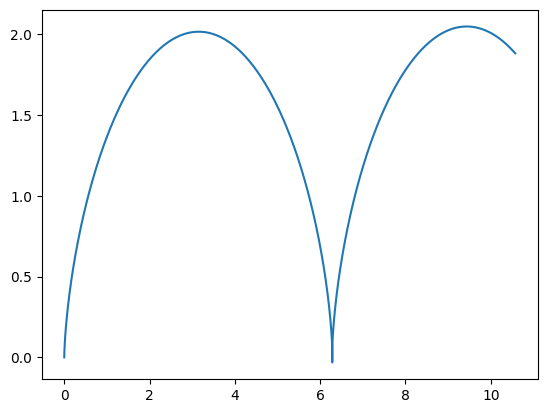

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# Define Parameters
x0 = 0.0  # meters
y0 = 0.0  # meters
initial_velocity = 0.0  # m/s
initial_angle = 0  # degrees

# field parameters
E = 1
B = 1
q_m=1
m=1

# Time step size for the simulation
dt = 0.01# seconds

# z = (x,y,vx,vy)   "state"

#initial state y0 =[x,y,vx,vy]
z0 = [0,0,0,0]
z = z0

#def function_F(t,z):
    #f0 = z[2]
    #f1 = z[3]
    #f2 = q_m * z[3]*B
    #f3 = q_m *(E-z[2]*B)
    #return np.array([f0 , f1 , f2 , f3])
    
def f(t,z):
    return np.array([z[2],z[3],z[3],1-z[2]])

# chosen parameter
N = 1000 #num_staps # Number of time steps to simulate
tmax = 10 # maximum time 

time = np.linspace(0, tmax ,N ) # time arry
zt = np.zeros((N,4)) #state storage

#stapper
for cnt, t in enumerate(time):                                 
    
    z = Euler_step(f, t, z, (tmax/N))
    zt[cnt] = z

plt.plot(zt[:,0],zt[:,1], '-')
    

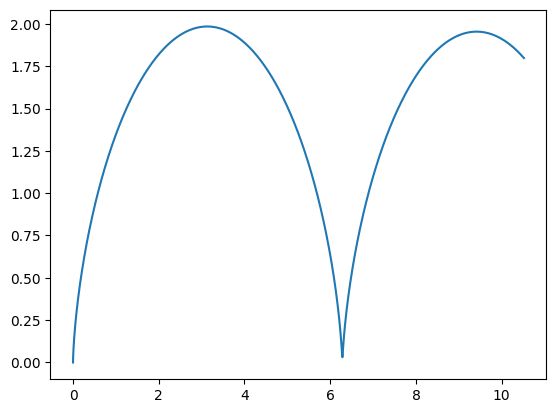

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x0=0
y0=0
z=[0,0,0,0]

def f(t,z):
    
    return np.array([z[2],z[3],z[3],1-z[2]])
    
def Heun_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)
n=1000
tmax=10
zt_Euler_B=np.zeros((n,4))
time=np.linspace(0, tmax,n)

for cnt,t in enumerate (time):
    z= Euler_B_step(f, t, z, tmax/n)
    zt_Euler_B[cnt]=z

plt.plot(zt_Euler_B[:,0],zt_Euler_B[:,1])

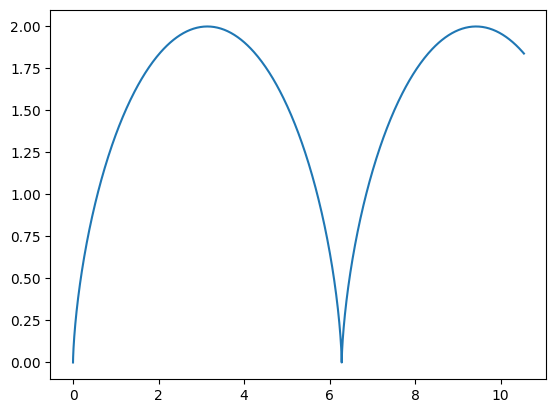

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x0=0
y0=0
z=[0,0,0,0]

def f(t,z):
    
    return np.array([z[2],z[3],z[3],1-z[2]])
n=1000
tmax=10
zt_Heun=np.zeros((n,4))
time=np.linspace(0, tmax,n)

for cnt,t in enumerate (time):
    z=Heun_step(f, t, z, tmax/n)
    zt_Heun[cnt]=z

plt.plot(zt_Heun[:,0],zt_Heun[:,1])

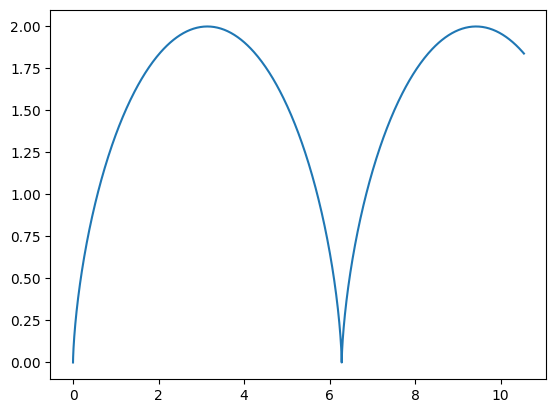

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x0=0
y0=0
z=[0,0,0,0]

def f(t,z):
    
    return np.array([z[2],z[3],z[3],1-z[2]])

n=1000
tmax=10
zt_RK2=np.zeros((n,4))
time=np.linspace(0, tmax,n)

for cnt,t in enumerate (time):
    z=RK2_step(f, t, z, tmax/n)
    zt_RK2[cnt]=z

plt.plot(zt_RK2[:,0],zt_RK2[:,1])

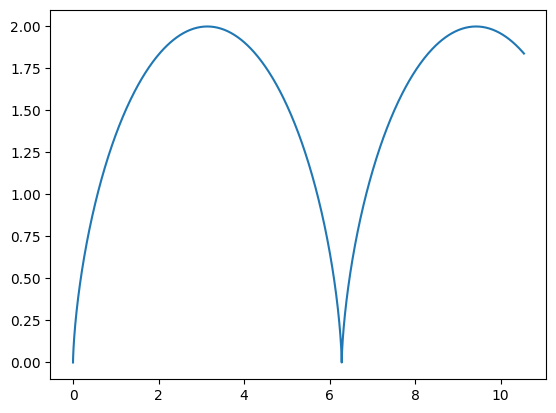

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x0=0
y0=0
z=[0,0,0,0]

def f(t,z):
    
    return np.array([z[2],z[3],z[3],1-z[2]])


n=1000
tmax=10
zt_RK3=np.zeros((n,4))
time=np.linspace(0, tmax,n)

for cnt,t in enumerate (time):
    z=RK3_step(f, t, z, tmax/n)
    zt_RK3[cnt]=z

plt.plot(zt_RK3[:,0],zt_RK3[:,1])

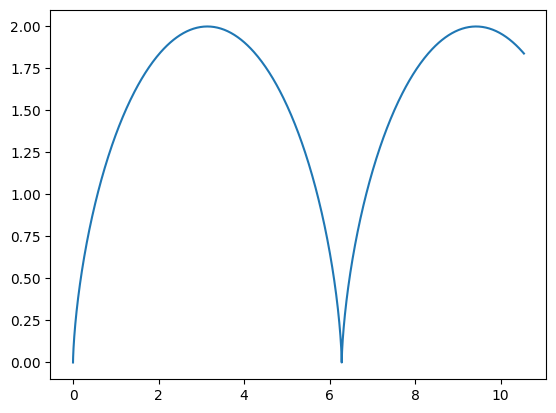

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x0=0
y0=0
z=[0,0,0,0]

def f(t,z): 
    return np.array([z[2],z[3],z[3],1-z[2]])

n=1000
tmax=10
zt_RK4=np.zeros((n,4))
time=np.linspace(0, tmax,n)

for cnt,t in enumerate (time):
    z=RK4_step(f, t, z, tmax/n)
    zt_RK4[cnt]=z

plt.plot(zt_RK4[:,0],zt_RK4[:,1])

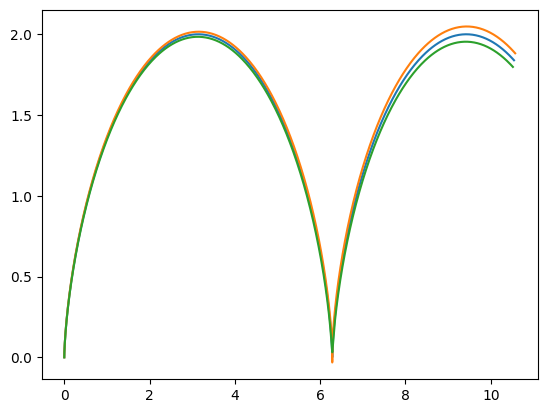

In [8]:
#error
import numpy as np
import matplotlib.pyplot as plt

def Analytics(R,w,t):
    xt = R*(w*t-np.sin(w*t))
    yt = R*(1-np.cos(w*t))
    return xt , yt

n=1000
tmax=10
zt_A =np.zeros((n,2))
time=np.linspace(0, tmax,n)

w=(q_m*B)/m
R = (m*E)/(q_m*B**2)

for cnt,t in enumerate (time):
    z = Analytics(R,w,t)
    zt_A[cnt] = z

plt.plot(zt_A[:,0],zt_A[:,1])
plt.plot(zt[:,0],zt[:,1])
plt.plot(zt_Euler_B[:,0],zt_Euler_B[:,1])


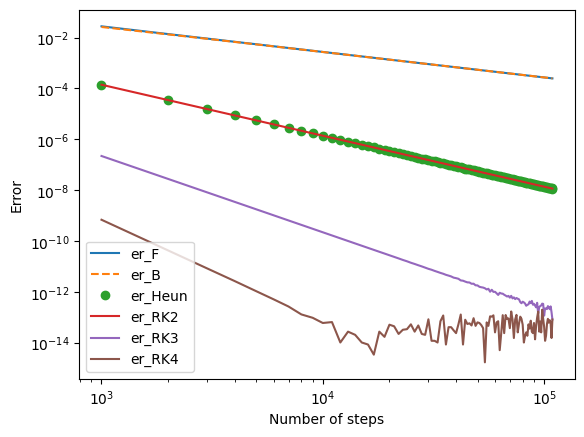

In [9]:
#error
import numpy as np
import matplotlib.pyplot as plt

def Analytics(R,w,t):
    xt = R*(w*t-np.sin(w*t))
    yt = R*(1-np.cos(w*t))
    return xt , yt

def f(t,z):
    return np.array([z[2],z[3],z[3],1-z[2]])

w=(q_m*B)/m
R = (m*E)/(q_m*B**2)


Nmax=[]
er_F=[]
er_B =[]
er_Heun=[]
er_RK2=[]
er_RK3 = []
er_RK4 = []

for n in range(1000,110000,1000):
    Nmax.append(n)
   
    tmax=10
    zt_A =np.zeros((n,2))
    time=np.linspace(0, tmax,n)
   
    z =  [0,0,0,0]
    zt = np.zeros((n,4))
    
    for cnt,t in enumerate (time):
        z = Euler_step(f, t, z, (tmax/n))
        zt[cnt] = z
      
    zt_Euler_B=np.zeros((n,4))
    z =  [0,0,0,0]
    for cnt,t in enumerate (time):
        z= Euler_B_step(f, t, z, tmax/n)
        zt_Euler_B[cnt]=z
        
    zt_Heun=np.zeros((n,4))    
    z =  [0,0,0,0]  
    for cnt,t in enumerate (time):
        z=Heun_step(f, t, z, tmax/n)
        zt_Heun[cnt]=z
        
    zt_RK2=np.zeros((n,4))
    z =  [0,0,0,0]
    for cnt,t in enumerate (time):
        z=RK2_step(f, t, z, tmax/n)
        zt_RK2[cnt]=z
   
    zt_RK3=np.zeros((n,4))
    z =  [0,0,0,0]
    for cnt,t in enumerate (time):
        z=RK3_step(f, t, z, tmax/n)
        zt_RK3[cnt]=z
             
    zt_RK4=np.zeros((n,4))
    z =  [0,0,0,0]
    for cnt,t in enumerate (time):
        z=RK4_step(f, t, z, tmax/n)
        zt_RK4[cnt]=z
    
        zt_A[cnt] = Analytics(R,w,t)
    
    er_F1  = np.abs(zt[-1,0]-zt_A[-1,0]) 
    er_F.append(er_F1)
    er_B1  = np.abs(zt_Euler_B[-1,0]-zt_A[-1,0]) 
    er_B.append(er_B1)
    er_Heun1  = np.abs(zt_Heun[-1,0]-zt_A[-1,0]) 
    er_Heun.append(er_Heun1)
    er_RK21  = np.abs(zt_RK2[-1,0]-zt_A[-1,0]) 
    er_RK2.append(er_RK21)
    er_RK31  = np.abs(zt_RK3[-1,0]-zt_A[-1,0]) 
    er_RK3.append(er_RK31)
    er_RK41  = np.abs(zt_RK4[-1,0]-zt_A[-1,0]) 
    er_RK4.append(er_RK41)
             
plt.loglog(Nmax,er_F)
plt.loglog(Nmax,er_B,'--')
plt.loglog(Nmax,er_Heun,'o')
plt.loglog(Nmax,er_RK2)
plt.loglog(Nmax,er_RK3)
plt.loglog(Nmax,er_RK4)
plt.ylabel('Error')
plt.xlabel('Number of steps')
plt.legend(["er_F", "er_B","er_Heun","er_RK2","er_RK3","er_RK4"], loc ="lower left")